## Johns Hopkins University global cases

https://github.com/CSSEGISandData/COVID-19

Johns Hopkins University. Note: Numbers rely on public data from multiple sources. Data updated xxxx 2020

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
date_format = mdates.DateFormatter('%d %b')

In [168]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Import all cases – UK, France, Denmark and the netherlands have overseas territory that ne need to drop from our groupby count

– Fill NaN with 'test' as the column is populated by strings

– Create two new dataframes – drop `test`, and drop `is not` test

– Drop what we don't want from the smaller `is not` set

– Join data together

https://www.science-emergence.com/Articles/How-to-remove-one-or-multiple-rows-in-a-pandas-DataFrame-in-python-/


In [169]:
global_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
                       parse_dates=True)
global_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


In [170]:
global_cases = global_cases.fillna('test')
global_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,test,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,test,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,test,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,test,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,test,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


## What is in the Province/State column?

We should split these rows as we only want country data – so we drop overseas territory, and then sum China, Canada and Australia

In [171]:
global_cases['Province/State'].unique()

array(['test', 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'S

In [172]:
global_cases['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

## Drop rows using a value in a column

global_cases.drop(global_cases[global_cases['Province/State'] != 'test'].index)

global_cases.drop(global_cases[global_cases['Province/State'] != 'test'].index, inplace=True)

df.drop(df[df['Age'] < 25].index, inplace = True) 


## Create new dataframe with `only countres` – we're dropping all rows in `Province/State` that are not `'test'`

In [173]:
countries = global_cases.drop(global_cases[global_cases['Province/State'] != 'test'].index)
countries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,test,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,test,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,test,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,test,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,test,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


## Now let's create a dataframe containing only the `overseas territories or regions` in Province/State – that's all the `rows marked 'test'`

In [174]:
regional = global_cases.drop(global_cases[global_cases['Province/State'] == 'test'].index)
regional.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3092,3095,3098,3104,3104,3106,3110,3110,3109,3112
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1058,1058,1058,1059,1059,1060,1060,1061,1061,1062
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,440,440,440,440,440,440,440,440,440,440


In [175]:
regional['Country/Region'].value_counts()

China             33
Canada            14
United Kingdom    10
France            10
Australia          8
Netherlands        4
Denmark            2
Name: Country/Region, dtype: int64

## Now let's drop the rows containing UK, France, Denmark and the Netherlands from the `regional dataframe`

In [176]:
lose_these = ['United Kingdom', 'France', 'Netherlands', 'Denmark']
regional.drop(regional[regional['Country/Region'].isin(lose_these)].index, inplace=True)

In [177]:
regional['Country/Region'].value_counts()

China        33
Canada       14
Australia     8
Name: Country/Region, dtype: int64

## So now we have a dataframe of countries called `countries` and a dataframe of countries by regional called `regional` that excludes all of the UK, France, Denmark and Netherlands overseas territories

## Let's join the data

In [178]:
data_frames = [countries, regional]
cases_clean =  pd.concat(data_frames)
cases_clean

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,test,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,test,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,test,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,test,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,test,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Yunnan,China,24.9740,101.4870,1,2,5,11,16,26,...,185,185,185,185,185,185,185,185,185,185
81,Zhejiang,China,29.1832,120.0934,10,27,43,62,104,128,...,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268
231,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,1,1,1,1,-1,0,0,0,0,0
244,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5


In [179]:
cases_clean['Country/Region'].value_counts()

China        33
Canada       14
Australia     8
Greece        1
Guatemala     1
             ..
Laos          1
Zimbabwe      1
Jordan        1
Colombia      1
Yemen         1
Name: Country/Region, Length: 188, dtype: int64

## And now let's group by country to sum Australia, Canada and China regions

In [180]:
final_cases = cases_clean.groupby('Country/Region').sum()
final_cases

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,446,447,448,449,451,457,464,464,464,472
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,283,310,323,354,399,419,453,469,482,484


## And sort A-Z and reset index

In [181]:
final_cases = final_cases.reset_index()
final_cases = final_cases.sort_values(by='Country/Region')
final_cases

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,446,447,448,449,451,457,464,464,464,472
184,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
185,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,283,310,323,354,399,419,453,469,482,484
186,Zambia,-15.416700,28.283300,0,0,0,0,0,0,0,...,1057,1057,1057,1089,1089,1089,1089,1089,1089,1089


## Save and export the final cleaned up dataset – and reimport

All countries grouped by `Country / Region`

In [182]:
final_cases.to_csv('data/jhu/global_cases_clean.csv')

## Import cleaned data

We can't parse dates tet as the column headers are not dates

In [183]:
total_cases = pd.read_csv('data/jhu/global_cases_clean.csv', index_col=0,
                         usecols =[i for i in final_cases if i != ' '])
total_cases

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,446,447,448,449,451,457,464,464,464,472
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,283,310,323,354,399,419,453,469,482,484


## Drop the lat and long cols – we don't need them

In [184]:
total_cases.drop(['Lat', 'Long'], axis=1, inplace=True)
total_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
Albania,0,0,0,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
Algeria,0,0,0,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
Andorra,0,0,0,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
Angola,0,0,0,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


## Get daily case count per country

`Use diff() method`

Axis = 1 to calculate along columns

In [185]:
daily_cases = total_cases.diff(axis=1, periods=1)
daily_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,623.0,866.0,680.0,545.0,759.0,758.0,787.0,915.0,582.0,791.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,23.0,15.0,6.0,21.0,20.0,13.0,15.0,20.0,14.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,137.0,133.0,127.0,119.0,113.0,107.0,98.0,104.0,115.0,104.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,79.0,7.0,1.0,0.0,0.0,0.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0


In [186]:
brazil = daily_cases[daily_cases.index == 'Brazil']
brazil

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26928.0,33274.0,16409.0,11598.0,28936.0,28633.0,30925.0,30830.0,27075.0,18912.0


## Rolling seven day average of new cases

Use `rolling()` method

`Axis = 1` to average along columns

In [187]:
seven_days = daily_cases.rolling(7, axis=1).mean()
seven_days.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,634.714286,646.714286,660.428571,653.857143,668.285714,687.285714,716.857143,758.571429,718.000000,733.857143
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,16.857143,19.000000,19.857143,19.857143,19.285714,19.142857,17.285714,16.142857,15.714286,15.571429
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,173.714286,164.857143,155.428571,144.285714,132.714286,125.142857,119.142857,114.428571,111.857143,108.571429
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.285714,0.285714,0.285714,0.285714,11.571429,12.571429,12.714286,12.571429,12.571429,12.571429
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,3.000000,3.285714,2.428571,2.285714,2.285714,2.142857,1.714286,0.714286,0.571429,0.714286


## % difference between two dates using `pct_change()` method

select the colums to compare

In [188]:
final_cols = seven_days.loc[:, ['4/28/20', '5/5/20']]
final_cols.head()

,4/28/20,5/5/20
Country/Region,,
Afghanistan,105.142857,199.428571
Albania,20.142857,10.000000
Algeria,119.714286,169.857143
Andorra,3.714286,1.142857
Angola,0.428571,1.285714


In [189]:
final_cols['percent_change'] = ((final_cols['5/5/20'] / final_cols['4/28/20']) - 1) * 100
final_cols.head()

,4/28/20,5/5/20,percent_change
Country/Region,,,
Afghanistan,105.142857,199.428571,89.673913
Albania,20.142857,10.000000,-50.354610
Algeria,119.714286,169.857143,41.885442
Andorra,3.714286,1.142857,-69.230769
Angola,0.428571,1.285714,200.000000


In [190]:
final_cols = seven_days.loc[:, ['4/28/20', '5/5/20']]
final_cols.head()

,4/28/20,5/5/20
Country/Region,,
Afghanistan,105.142857,199.428571
Albania,20.142857,10.000000
Algeria,119.714286,169.857143
Andorra,3.714286,1.142857
Angola,0.428571,1.285714


In [191]:
final_cols_pct = final_cols.pct_change(axis=1) * 100
final_cols_pct.head()

,4/28/20,5/5/20
Country/Region,,
Afghanistan,NaN,89.673913
Albania,NaN,-50.354610
Algeria,NaN,41.885442
Andorra,NaN,-69.230769
Angola,NaN,200.000000


## Transpose the daily cases data and reset the index so we can visualise after changing string into datetime object

In [192]:
daily_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,623.0,866.0,680.0,545.0,759.0,758.0,787.0,915.0,582.0,791.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,23.0,15.0,6.0,21.0,20.0,13.0,15.0,20.0,14.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,137.0,133.0,127.0,119.0,113.0,107.0,98.0,104.0,115.0,104.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,79.0,7.0,1.0,0.0,0.0,0.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0


In [193]:
transp = daily_cases.transpose()
transp.reset_index(inplace = True) 
transp.head()

Country/Region,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Convert date string to datetime objects

In [194]:
transp['index'] = pd.to_datetime(transp['index'])

In [195]:
## Inspect Iran data
iran = daily_cases.loc['Iran':'Iran']
iran = iran.transpose()
iran.tail()
# iran.to_csv('data/jhu/test.csv')

Country/Region,Iran
6/3/20,3134.0
6/4/20,3574.0
6/5/20,2886.0
6/6/20,2269.0
6/7/20,2364.0


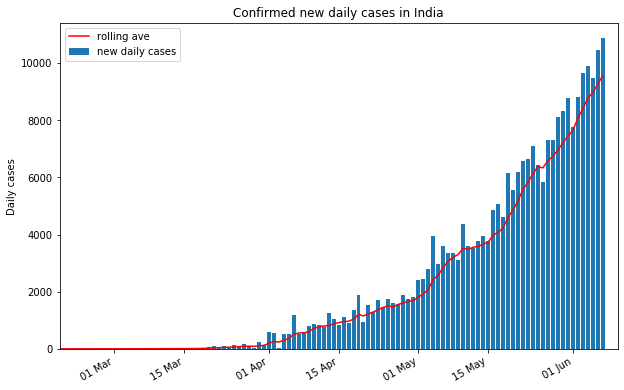

In [196]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(transp['index'], transp['India'].rolling(7).mean(), label='rolling ave', c='r')
ax.bar(transp['index'], transp['India'], label='new daily cases')
ax.set_xlim('2020-02-19', '2020-06-10')
plt.title('Confirmed new daily cases in India')
plt.ylabel('Daily cases')
plt.legend()

plt.xticks(rotation=30, ha='right')
ax.xaxis.set_major_formatter(date_format)

plt.savefig('output/jhu/India_daily_cases.pdf')

In [197]:
selected_cases = transp[['index','United Kingdom', 'France', 'Italy', 'US', 'Brazil', 'Mexico', 'India']]
selected_cases

Country/Region,index,United Kingdom,France,Italy,US,Brazil,Mexico,India
0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,2.0,0.0,1.0,0.0,0.0,0.0
3,2020-01-25,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
133,2020-06-03,1871.0,3856.0,321.0,19699.0,28633.0,3912.0,9633.0
134,2020-06-04,1805.0,-2850.0,177.0,21140.0,30925.0,4442.0,9889.0
135,2020-06-05,1650.0,552.0,518.0,24720.0,30830.0,4346.0,9471.0
136,2020-06-06,1557.0,529.0,270.0,22681.0,27075.0,3593.0,10438.0


In [198]:
selected_cases.to_csv('data/jhu/out_global.csv')

## Check data export in Excel, delete the index col and import

In [199]:
new_cases = pd.read_csv('data/jhu/out_global.csv', parse_dates=['index'], index_col=0, 
                        dayfirst=True, usecols =[i for i in selected_cases if i != ''])
new_cases.tail()

,United Kingdom,France,Italy,US,Brazil,Mexico,India
index,,,,,,,
2020-06-03,1871.0,3856.0,321.0,19699.0,28633.0,3912.0,9633.0
2020-06-04,1805.0,-2850.0,177.0,21140.0,30925.0,4442.0,9889.0
2020-06-05,1650.0,552.0,518.0,24720.0,30830.0,4346.0,9471.0
2020-06-06,1557.0,529.0,270.0,22681.0,27075.0,3593.0,10438.0
2020-06-07,1326.0,293.0,197.0,22302.0,18912.0,3484.0,10864.0


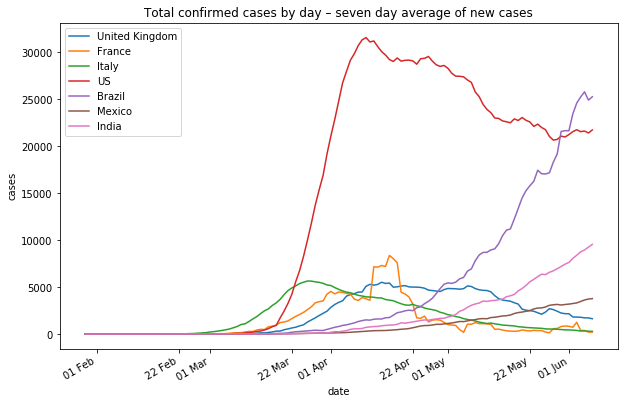

In [200]:
fig, ax = plt.subplots(figsize=(10, 6))

for column, value in new_cases.items():
    ax.plot(value.rolling(7).mean(), label=column)

# plt.yscale('log')
plt.ylabel('cases')
plt.xlabel('date')
plt.title('Total confirmed cases by day – seven day average of new cases')
plt.xticks(rotation=30, ha='right')
ax.xaxis.set_major_formatter(date_format)

plt.legend()
plt.savefig('output/jhu/global_daily_cases.pdf');

## Cases as small multiples

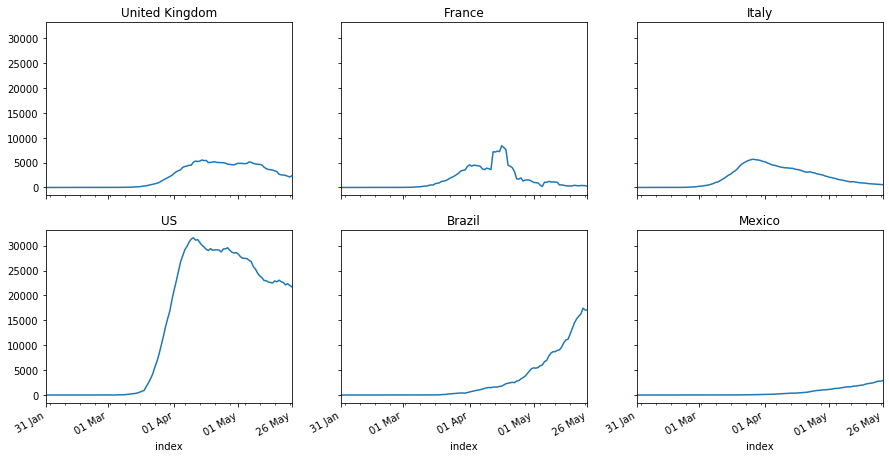

In [201]:
fig, ax = plt.subplots(2, 3, figsize=(15,7), sharex=True, sharey=True)

plt.title('Total confirmed cases by day – seven day average of new cases') 

for ax, column in zip(ax.flat, new_cases):
    ax.set_title(column)
    new_cases[column].rolling(7).mean().plot(ax=ax)
    plt.sca(ax)
    plt.xticks(rotation=30, ha='right')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlim('2020-02-01', '2020-05-26')
    
plt.show()
# plt.savefig('XXXX.pdf')


## Cases and deaths small multiples – Update deaths notebook

new_deaths = pd.read_csv('data/jhu/out_global_deaths.csv', parse_dates=True, index_col=0)
new_deaths.tail()

In [204]:
new_deaths = pd.read_csv('data/jhu/out_global_deaths.csv', 
                         parse_dates=True, index_col=0, dayfirst=False,
                        usecols =[i for i in new_deaths if i != ''])
new_deaths.tail()

,United Kingdom,France,Italy,US,Mexico,Brazil,India
index,,,,,,,
2020-06-03,359.0,81.0,71.0,995.0,1092.0,1349.0,259.0
2020-06-04,176.0,43.0,88.0,1036.0,816.0,1473.0,275.0
2020-06-05,357.0,46.0,85.0,921.0,625.0,1005.0,286.0
2020-06-06,204.0,31.0,72.0,670.0,341.0,904.0,297.0
2020-06-07,77.0,13.0,53.0,712.0,188.0,525.0,261.0


## Cases and deaths plotted for countries we need

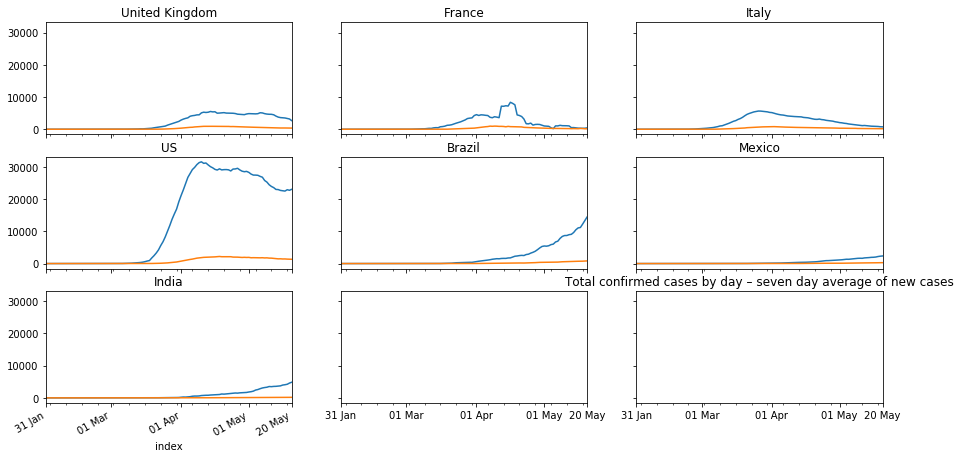

In [205]:
fig, ax = plt.subplots(3, 3, figsize=(15,7), sharex=True, sharey=True)

plt.title('Total confirmed cases by day – seven day average of new cases') 

for ax, column in zip(ax.flat, new_cases):
    ax.set_title(column)
    new_cases[column].rolling(7).mean().plot(ax=ax)
    new_deaths[column].rolling(7).mean().plot(ax=ax)
    
    plt.sca(ax)
    plt.xticks(rotation=30, ha='right')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlim('2020-02-01', '2020-05-20')
    
plt.show()
# plt.savefig('XXXX.pdf')

## Daily cases for Brazil, US, UK, Russia and Mexico

In [206]:
americas = transp[['index','United Kingdom', 'US', 'Brazil', 'Russia', 'Mexico']]
americas.to_csv('data/jhu/americas_cases_daily.csv')

## Import daily americas cases

In [208]:
americas_clean = pd.read_csv('data/jhu/americas_cases_daily.csv', parse_dates=True, index_col=0,
                            usecols =[i for i in americas_clean if i != ''])
americas_clean.tail(15)

,United Kingdom,US,Brazil,Russia,Mexico
index,,,,,
2020-05-24,2405.0,20634.0,15813.0,8599.0,2764.0
2020-05-25,1625.0,19056.0,11687.0,8946.0,2485.0
2020-05-26,4043.0,18611.0,16324.0,8915.0,3455.0
2020-05-27,2013.0,18263.0,20599.0,8338.0,3463.0
2020-05-28,1887.0,22577.0,26417.0,8371.0,3377.0
2020-05-29,2095.0,24266.0,26928.0,8572.0,3227.0
2020-05-30,1604.0,24146.0,33274.0,8952.0,2885.0
2020-05-31,1936.0,20007.0,16409.0,9268.0,3152.0
2020-06-01,1570.0,20848.0,11598.0,8485.0,2771.0


## Total cases globally and for the americas

In [209]:
total_global = total_cases.transpose()
total_global.reset_index(inplace=True)
total_global.tail()

Country/Region,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
133,6/3/20,17267,1184,9733,851,86,26,19268,10524,7240,...,279856,828,3843,1952,328,457,9,419,1089,222
134,6/4/20,18054,1197,9831,852,86,26,20197,11221,7247,...,281661,832,3939,2087,328,464,9,453,1089,237
135,6/5/20,18969,1212,9935,852,86,26,21037,11817,7252,...,283311,834,4007,2145,328,464,9,469,1089,265
136,6/6/20,19551,1232,10050,852,88,26,22020,12364,7259,...,284868,845,4094,2316,329,464,9,482,1089,279
137,6/7/20,20342,1246,10154,852,91,26,22794,13130,7265,...,286194,845,4331,2377,331,472,9,484,1089,282


In [210]:
total_americas = total_global[['index','United Kingdom', 'US', 'Brazil', 'Russia', 'Spain']]
total_americas.to_csv('data/jhu/americas_cases_total.csv')

## Import total americas cases

In [213]:
americas_clean = pd.read_csv('data/jhu/americas_cases_total.csv',
                             parse_dates=True, index_col=0, dayfirst=False,
                             usecols =[i for i in americas_clean if i != ''])
americas_clean.head()

,United Kingdom,US,Brazil,Russia,Spain
index,,,,,
2020-01-22,0,1,0,0,0
2020-01-23,0,1,0,0,0
2020-01-24,0,2,0,0,0
2020-01-25,0,2,0,0,0
2020-01-26,0,5,0,0,0


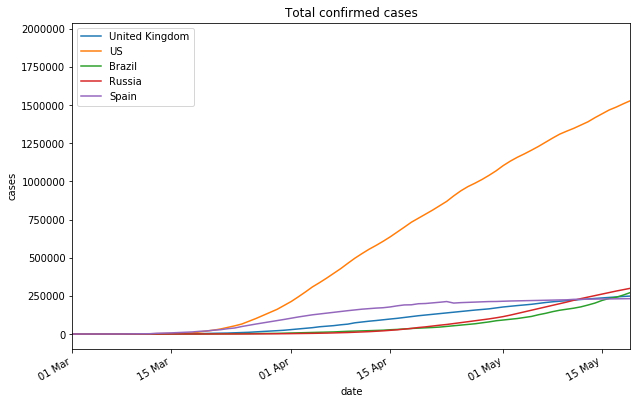

In [214]:
fig, ax = plt.subplots(figsize=(10,6))

for column, value in americas_clean.items():
    ax.plot(value, label=column)
    
plt.ylabel('cases')
plt.xlabel('date')
plt.title('Total confirmed cases')
#     plt.yscale('log')
plt.xticks(rotation=30, ha='right')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlim('2020-03-01', '2020-05-19')
plt.legend()
    
plt.savefig('output/jhu/americas_cases.pdf')
plt.show()